# Activity 4 -- Stellar Evolution Models & Cluster CMD's

In today's activity, we are going to be working with [MIST stellar evolution models](https://waps.cfa.harvard.edu/MIST/index.html) and star cluster data. MIST creates model isochrones to use in HR diagrams or color-magnitude diagrams (CMD's). Then the cluster data is B and V magnitudes of stars in the Pleiades open cluster. We're going to use the data and MIST models to determine the age and distance of the cluster!

**Make sure to upload the data files for this activity to Colab so you can use them in the notebook:**

- "read_mist_models.py" - contains python functions needed to read in the MIST models
- "MIST_model.cmd" - contains the MIST model isochrone (may take a few minutes to upload)
- "Pleiades.csv" - contains Gaia photometry for many stars in the Pleiades cluster


In [33]:
# Make sure you import the packages we need by running this cell
import matplotlib.pyplot as plt
import numpy as np
from astropy.io import ascii
%matplotlib inline

# import package to read in MIST models
import read_mist_models

## Part 1 - Working with MIST isochrones

A model isochrone (".cmd") file contains some physical properties of the star plus synthetic photometry for stars of different masses and ages.

**Step 1** - Read in the model isocrhone file using the pre-written function below:

In [34]:
model_cmd = read_mist_models.ISOCMD('MIST_model.cmd')

Reading in: MIST_model.cmd


**Step 2** - Run the following cell to print out some information about the models, such as the abundances, possible isochrone ages (in log10), and column names.

In [35]:
print('abundances: ', model_cmd.abun)
print('log(age): ', [round(x,2) for x in model_cmd.ages])
print('columns: ', model_cmd.hdr_list)

abundances:  {'Yinit': 0.2703, 'Zinit': 0.0142857, '[Fe/H]': 0.0, '[a/Fe]': 0.0}
log(age):  [5.0, 5.05, 5.1, 5.15, 5.2, 5.25, 5.3, 5.35, 5.4, 5.45, 5.5, 5.55, 5.6, 5.65, 5.7, 5.75, 5.8, 5.85, 5.9, 5.95, 6.0, 6.05, 6.1, 6.15, 6.2, 6.25, 6.3, 6.35, 6.4, 6.45, 6.5, 6.55, 6.6, 6.65, 6.7, 6.75, 6.8, 6.85, 6.9, 6.95, 7.0, 7.05, 7.1, 7.15, 7.2, 7.25, 7.3, 7.35, 7.4, 7.45, 7.5, 7.55, 7.6, 7.65, 7.7, 7.75, 7.8, 7.85, 7.9, 7.95, 8.0, 8.05, 8.1, 8.15, 8.2, 8.25, 8.3, 8.35, 8.4, 8.45, 8.5, 8.55, 8.6, 8.65, 8.7, 8.75, 8.8, 8.85, 8.9, 8.95, 9.0, 9.05, 9.1, 9.15, 9.2, 9.25, 9.3, 9.35, 9.4, 9.45, 9.5, 9.55, 9.6, 9.65, 9.7, 9.75, 9.8, 9.85, 9.9, 9.95, 10.0, 10.05, 10.1, 10.15, 10.2, 10.25, 10.3]
columns:  ['EEP', 'log10_isochrone_age_yr', 'initial_mass', 'star_mass', 'log_Teff', 'log_g', 'log_L', '[Fe/H]_init', '[Fe/H]', 'Bessell_U', 'Bessell_B', 'Bessell_V', 'Bessell_R', 'Bessell_I', '2MASS_J', '2MASS_H', '2MASS_Ks', 'Kepler_Kp', 'Kepler_D51', 'Hipparcos_Hp', 'Tycho_B', 'Tycho_V', 'Gaia_G_DR2Rev', 'Ga

a. What is the approximate range of isochrone ages available in the model?

b. What are two examples of columns that tell us about the physical properties of the star?

c. What are two examples of columns that tell us about the observed properties of the star?

Answer here:

\



**Step 3** - The model isochrone file contains the data for many different ages. Now let's practice grabbing the data for a single age.

I wrote a basic function to pull out the data for a specific age (given in years). Run this cell to activate the function.

In [ ]:
# This function will grab the isochrone whose age most
#    closely matches the requested age
def get_isochrone(age):
  # input = age in Gyr
  log_age = np.log10(age)
  age_ind = model_cmd.age_index(log_age)
  return model_cmd.isocmds[age_ind]


Then, enter an age for the cluster in the "age" variable in the cell below. Run the cell to plot the isocrhone for that age. Try a few different ages from 1 Myr to 10 Gyr to see how it changes.

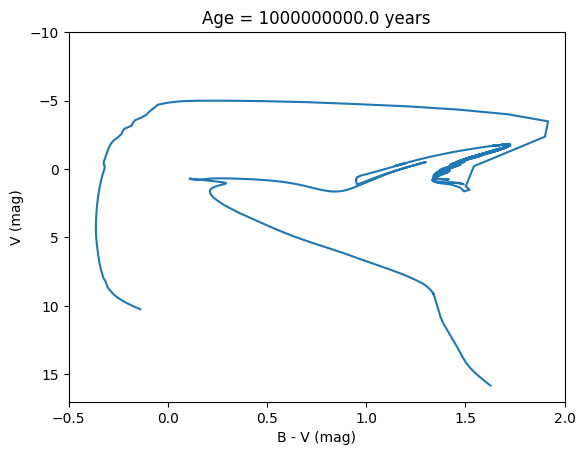

In [38]:
age = 1e9      # enter isochrone in years

# use the function to get the isochrone we want
model = get_isochrone(age)

# plot the isochrone on a color-magnitude diagram
B = model['Bessell_B']
V = model['Bessell_V']
plt.plot(B-V, V)

plt.xlabel('B - V (mag)')
plt.ylabel('V (mag)')
plt.title('Age = '+str(age)+' years')
plt.xlim(-0.5, 2.0)
plt.ylim(17, -10)
plt.show()

## Part 2 - Pleiades cluster

We're going to work with a CMD of the Pleiades open cluster using Gaia photometry for from [Heyl et al. 2022](https://ui.adsabs.harvard.edu/abs/2022ApJ...926..132H/abstract).  Gaia measures the apparent magnitude of each star in a wide $G$-band (green) filter, a narrow $R_p$ (red) filter, and a narrow $B_p$ (blue) filter.  The file contains columns for the star's Gaaia ID, coordinates, $G$ magnitude, and the $B_p - R_p$ color.

**Step 4** - First, let's read in the Gaia photometry from the CSV file using the astropy.ascii.read package. Write some code to read in the file and print  the data. (See Activity 2 part 1 for a reminder!)

In [41]:
# read in & print the file here
data = ascii.read('Pleiades.csv')
data


﻿Source_ID,RA,Dec,G,BpRp
float64,float64,float64,float64,float64
6.52832e+16,56.4568,24.3675,3.8633,-0.0138
6.653e+16,57.2968,24.1365,5.2033,-0.0331
6.49409e+16,57.0868,23.421,5.4283,-0.0671
6.52875e+16,56.201,24.2893,5.4413,-0.0212
6.98129e+16,56.2907,24.8391,5.6404,-0.0805
6.67985e+16,56.4771,24.5543,5.752,-0.023
6.40536e+16,57.4796,22.244,6.0404,0.0235
6.64535e+16,57.4315,23.7116,6.1592,-0.0497
6.67151e+16,56.8378,24.1161,6.2988,0.0094


**Step 5** - Next, pull out the columns that we want to use, $G$ magnitude and $B_p - R_p$ color, and put them into their own variables called "G_obs" and "color_obs". (Named with an "obs" suffix because they come from observations, rather than the MIST model.)

In [44]:
# Pull out the columns we want to use:
G_obs = data["G"]          # G magnitude
color_obs = data["BpRp"]   # Bp - Rp color


**Step 6** - Plot a color-magnitude diagram for this cluster:
- Plot the stars as black circles
- Add axis labels to something appropriate
- Change the y axis limits so brighter stars are at the top and fainter stars are at the bottom.

You should see a main sequence running diagonally acros the plot!

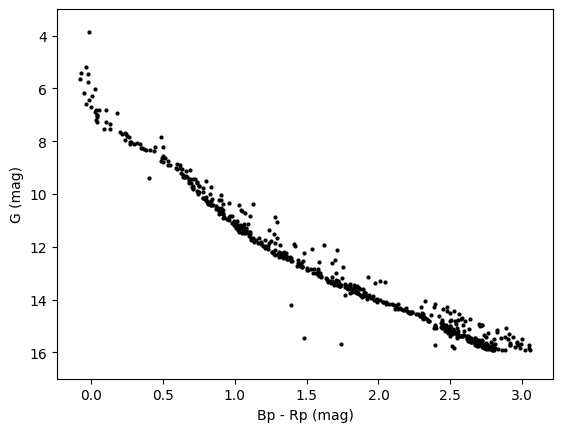

In [49]:
#plot CMD
plt.plot(color_obs, G_obs, 'ko', ms=2)
plt.xlabel('Bp - Rp (mag)')
plt.ylabel('G (mag)')
plt.ylim(17, 3)
plt.show()

## Part 3 - Distance & Age of the Pleiades

Let's combine everything we've done so far to compare the observed and model CMD to measure the distance and age of the Pleiades cluster.

**Step 7** - In order to overplot a model isochrone, we need to pull out the model data for the $G$, $B_p$, and $R_p$ filters. (Rather than Bessel $B$ and $V$ like we used in Part 1). I've started the code for you, so now all you need to do is calculate the model $B_p - R_p$ color ("color_model").

In [47]:
# Pull out the Gaia photometry from the MIST models into new variables
G_model = model['Gaia_G_EDR3']
Bp_model = model['Gaia_BP_EDR3']
Rp_model = model['Gaia_RP_EDR3']

# calculate the model color
color_model =  Bp_model - Rp_model


**Step 8** - Copy your code from Step 6 and overplot the model isochrone with the Pleiades data.

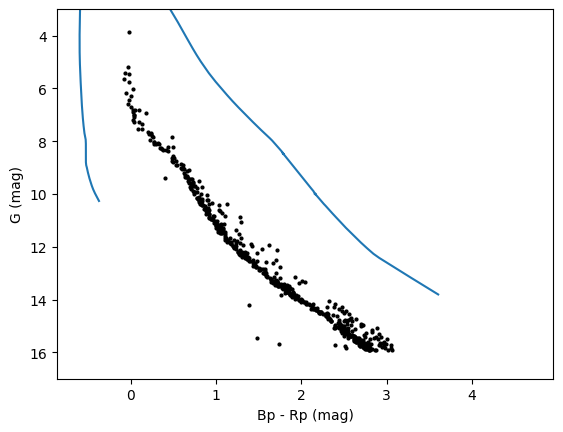

In [50]:
# Enter code here
#plot CMD
plt.plot(color_obs, G_obs, 'ko', ms=2)
plt.plot(color_model, G_model)
plt.xlabel('Bp - Rp (mag)')
plt.ylabel('G (mag)')
plt.ylim(17, 3)
plt.show()




That doesn't match very well does it?

The models don't take into account the cluster's distance, so the model uses absolute magnitude instead of apparent magnitude. But, this allows us to calculate the distance to the Pleiades using the distance modulus!

\

**Step 9** - Remember that the distance modulus relates the apparent magnitude of a star ($m$), the absolute magnitude ($M$) and the distance ($d$):
$$m - M = 5 \log d - 5$$

Pick a main sequence star from the Pleiades cluster and read off it's a apparent $G$ magnitude. Enter it in the "m" variable below. Then read off the absolute $G$ magnitude of the isochrone *at the same color value* as the Pleiades star you chose. Enter it in the "M" variable, then calculate the cluster distance ("D") using the distance modulus.

In [64]:
# Enter magnitudes here
m = 14.0
M = 9.0

# Calculate the cluster distance in parsecs
d = 10**((m-M+5)/5)

print('Pleiades distance = ', d, ' parsecs')

Pleiades distance =  100.0  parsecs


**Step 10** - Use the distance to convert the model absolute magnitudes ("G_model") to apparent magnitudes ("G_model_corrected").

In [56]:
G_model_corrected = G_model + 5 * np.log10(d) - 5


Then copy your code from Step 8 and plot the model's corrected G magnitudes instead. The main sequences should line up now!

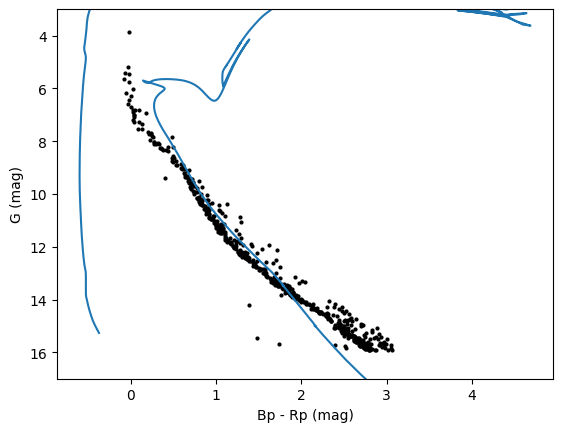

In [57]:
# Enter code here
#plot CMD
plt.plot(color_obs, G_obs, 'ko', ms=2)
plt.plot(color_model, G_model_corrected)
plt.xlabel('Bp - Rp (mag)')
plt.ylabel('G (mag)')
plt.ylim(17, 3)
plt.show()

**Step 11** - Let's find the age of the Pleiades by fiding the isochrone that best fits the cluster data.
\

Here is a recap of everything we've done. Copy both cells from Step 10 into the end of the cell. Then run the cell using different isochrone ages and find the one that fits the Pleiades the best.

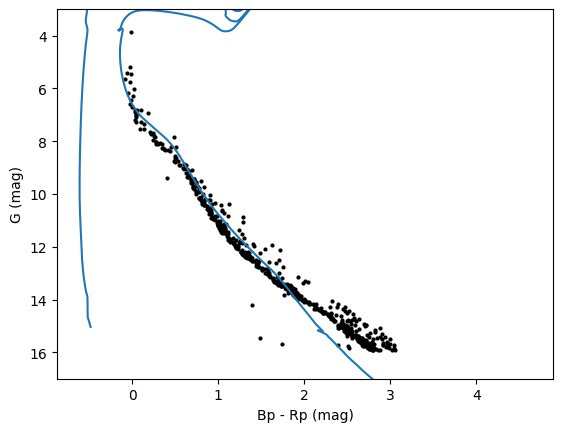

Pleiades age =  200.0  Million years


In [66]:
# test differnt isochrone ages (in years)
age = 2e8

# use the function to get the isochrone we want
model = get_isochrone(age)

# Pull out the Gaia photometry from the MIST models into new variables
G_model = model['Gaia_G_EDR3']
Bp_model = model['Gaia_BP_EDR3']
Rp_model = model['Gaia_RP_EDR3']

# calculate the model color
color_model =  Bp_model - Rp_model

# copy code from Step 10 here
# convert absolute G to apparent G
G_model_corrected = G_model + 5 * np.log10(d) - 5

# plot CMD
plt.plot(color_obs, G_obs, 'ko', ms=2)
plt.plot(color_model, G_model_corrected)
plt.xlabel('Bp - Rp (mag)')
plt.ylabel('G (mag)')
plt.ylim(17, 3)
plt.show()

print('Pleiades age = ', age/1e6, ' Million years')
